Step 1:
Import the boston house dataset from sklearn.datasets.
from sklearn.datasets import load_boston

boston = load_boston()

Create train and test datasets.

Check the data description and familiarize yourself with the data.

Load boston dataset has been removed from sklearn datasets due to racial bias... using an alternative California housing dataset provided

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.model_selection import train_test_split
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

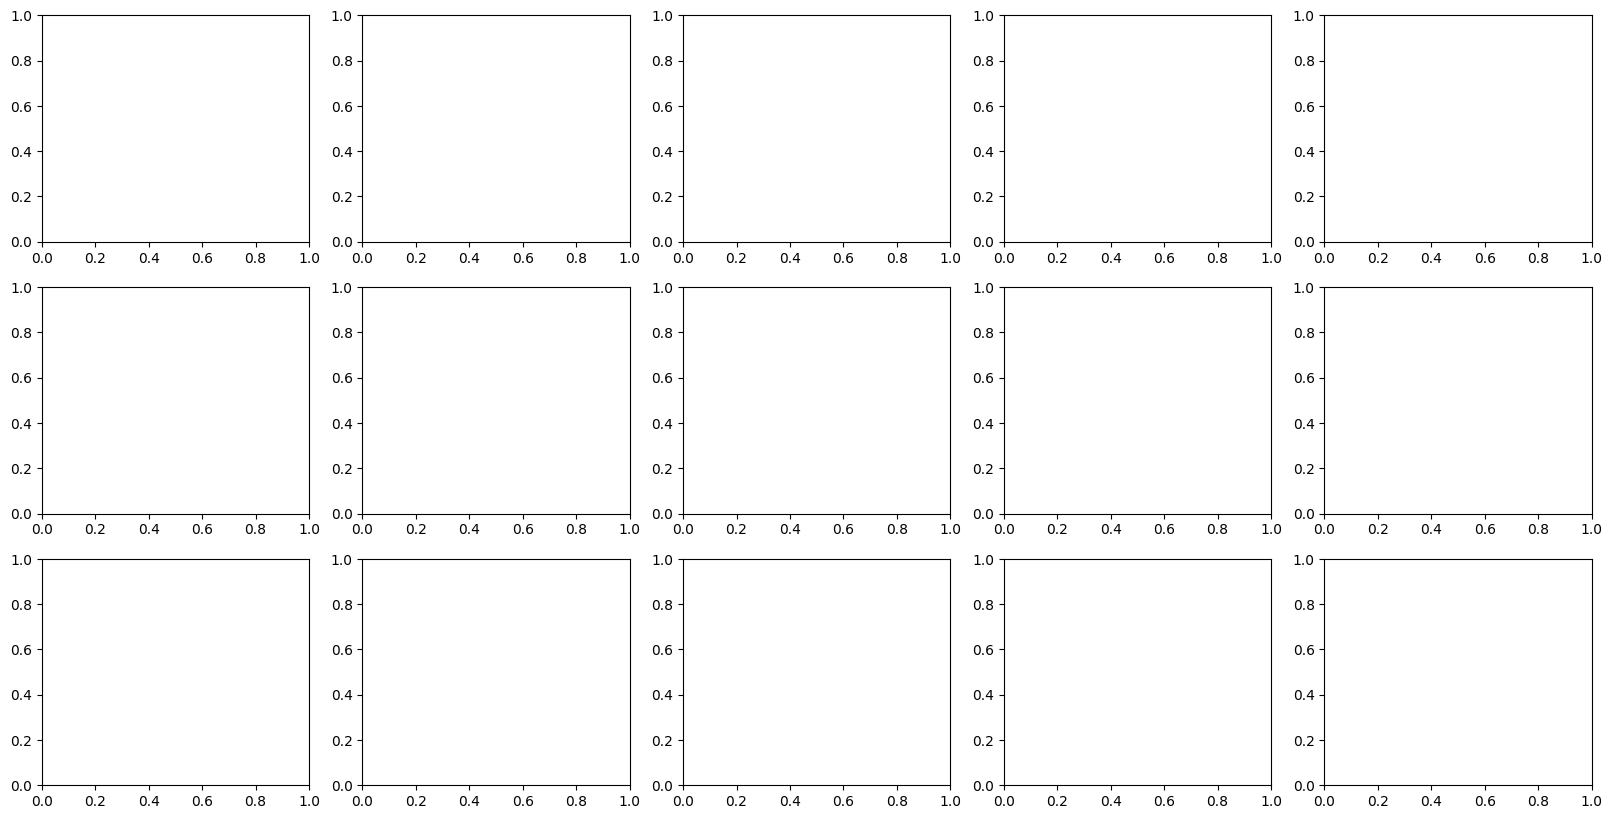

In [7]:
fig, axes =plt.subplots(3,5,figsize=(20,10))

In [8]:
axes.ravel()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

Create a scatter plot of each attribute with the mean house price.



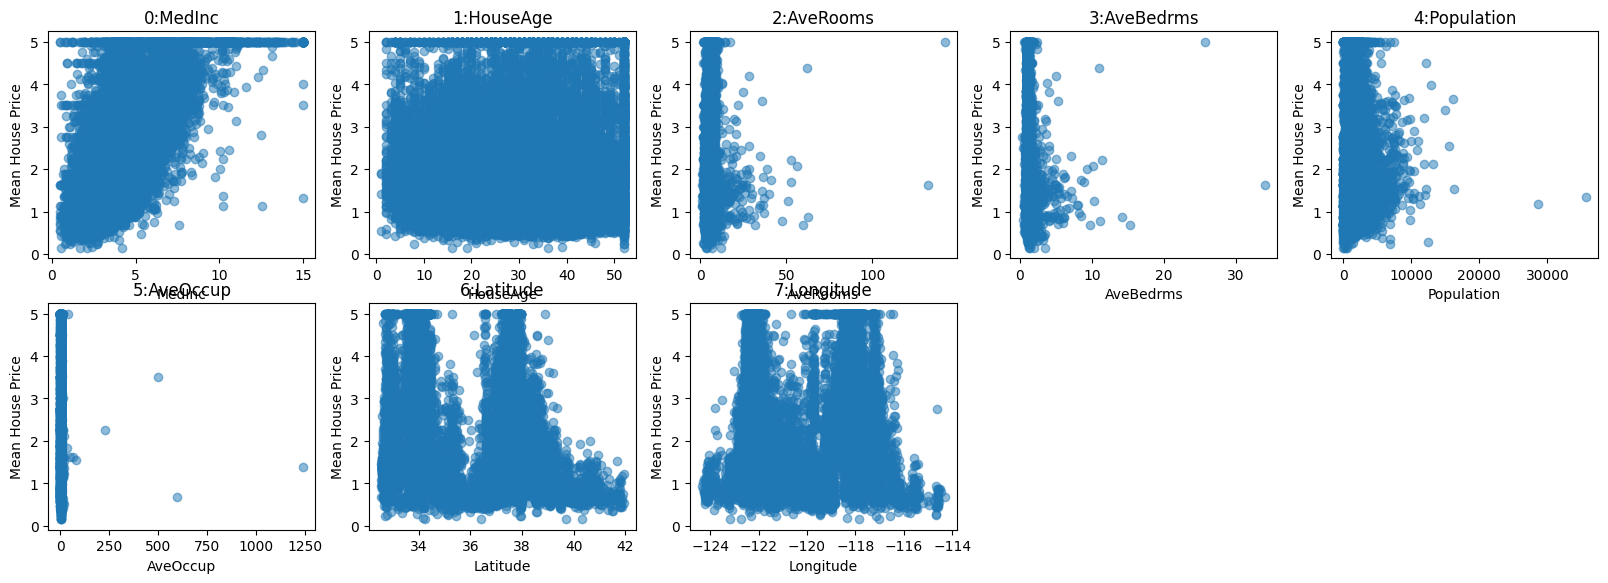

In [12]:
fig, axes = plt.subplots(3,5,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
  if i >= X.shape[1]:
    ax.set_visible(False)
    continue
  ax.plot(X[:,i],y,'o',alpha=.5)
  ax.set_title('{}:{}'.format(i,housing.feature_names[i]))
  ax.set_ylabel('Mean House Price')
  ax.set_xlabel(housing.feature_names[i])
#plt.tight_layout()

Create a box plot of all attributes.



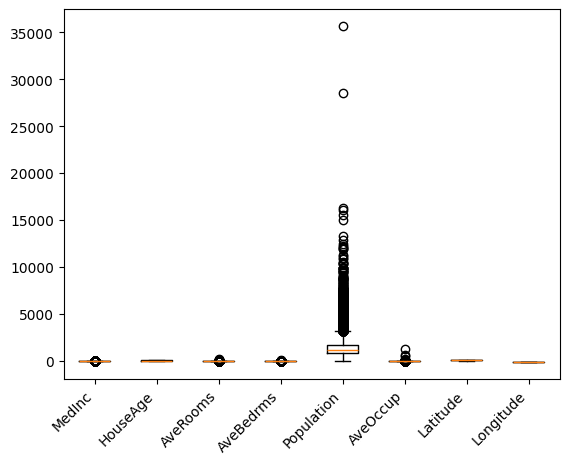

In [14]:
plt.boxplot(X)
plt.xticks(np.arange(1,X.shape[1]+1),
           housing.feature_names, rotation=45, ha='right');

Use StandardScaler() to scale the training data set.



In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Use KNeighborsRegressor() to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.



In [16]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_test, y_test)

0.14547754686032732

In [17]:
knr.score(X_train, y_train)

0.44253742581725575

In [18]:
knr.score(X_train_scaled, y_train)

-0.06731727934559362

In [20]:
X_test_scaled = scaler.transform(X_test)
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr_scaled.score(X_test_scaled, y_test)

0.687694265351535

Repeat Step 5 for RandomForestRegressor. Use

RandomForestRegressor(n_estimators=100, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train,y_train)
rfr.score(X_test, y_test)
#

0.7941678302821006

In [23]:
rfr_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rfr_scaled.fit(X_train_scaled,y_train)
rfr_scaled.score(X_test_scaled, y_test)

0.7942565042004356